<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>

# Exercise S2: Machine Learning Basics en TensorFlow

## Objetivos

El objetivo de este challenge es familiarizarnos con TensorFlow y con su funcionamiento básico enfrentandose a problemas de regresión.


## Regresión

### Punto de partida

El punto de partida se corresponde con el código que hemos visto en el worksheet:

In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams.update({'font.size': 14})
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# Cargamos el dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

# Creamos las estructuras que contienen las categorías
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # lista de todos los valores únicos contenidos en una columna
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

# Definimos nuestra función de input

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # función interna, esto es lo que será devuelto
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # crea un objeto tf.data.Dataset que contendrá datos y etiquetas 
    if shuffle:
      ds = ds.shuffle(1000)  # con esta línea aleatorizamos la selección de elementos
    ds = ds.batch(batch_size).repeat(num_epochs)  # divide el dataset en batches el número de veces especificado por num_epocs 
    return ds  # devuelve un batch del dataset
  return input_function  # devuelve el objeto completo para ser utilizado.

train_input_fn = make_input_fn(dftrain, y_train)  # así llamamos a la función que se nos devuelve para extraer el objeto dataset que inyectaremos en el modelo
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


# Creamos el modelo
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

# Lo entrenamos
linear_est.train(train_input_fn)  # entrenamos el modelo
result = linear_est.evaluate(eval_input_fn)  # obtenemos las estimaciones del conjunto de evaluación

clear_output()  # limpiamos la consola
print(result['accuracy'])  # la viariable result es un diccionario con los resultados de nuestro modelo

0.7462121


## Tareas


### Cambiando el histograma

En el worksheet tenemos el ejemplo de un histograma con las posibilidades de supervivencia de cada individuo del conjunto de evaluación, representad a continuación el mismo histograma pero con el conjunto de entrenamiento.


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpq1iune4o/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


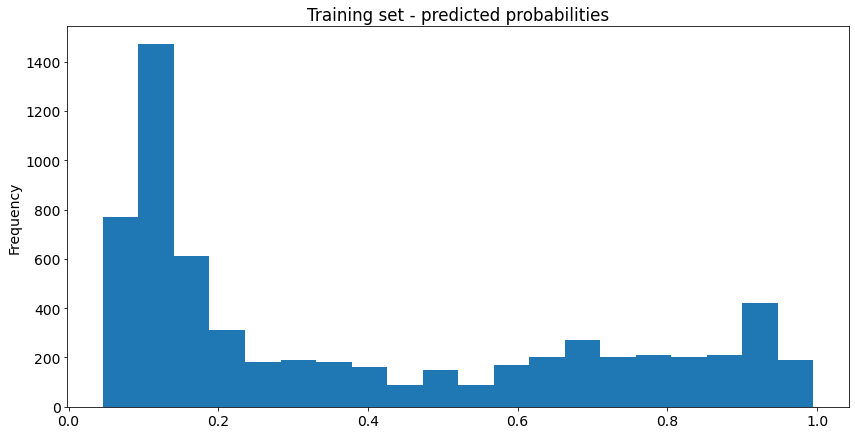

In [ ]:
pred_dicts = list(linear_est.predict(train_input_fn)) # Hace predicciones y devuelve un array con las probabilidades y los parámetros del modelo para este ejemplo

probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts]) # Seleccionamos la probabilidad de supervivencia y lo metemos en una serie de Panda para poder representarlo fácilmente

probs.plot(kind='hist', bins=20, title='Training set - predicted probabilities') # Representamos en forma de histograma

¿Y si lo que queremos es pintar el histograma de la mortalidad de cada individuo del conjunto de evaluación?

Pista, mirad la estructura del diccionario que devuelve *linear_est.predict()*

In [ ]:
import pprint
# Observamos como es la estructura, una lista con los valores para cada individuo contenidos en un diccionario,
# Este diccionario por individuo tiene multiples entradas o claves donde se contiene los resultados de la predicción.
# Atendemos que en el campo probabilities vienen dos valores con probabilidad. 
# El primero que corresponde al valor de clase 0 - Mortalidad y otro al valor de clase 1 Supervivencia.

pprint.pprint(pred_dicts[0:3])

[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6653086], dtype=float32),
  'logits': array([0.687042], dtype=float32),
  'probabilities': array([0.3346914 , 0.66530854], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.9491404], dtype=float32),
  'logits': array([2.9264874], dtype=float32),
  'probabilities': array([0.05085962, 0.94914037], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.07851383], dtype=float32),
  'logits': array([-2.4627125], dtype=float32),
  'probabilities': array([0.92148614, 0.07851386], dtype=float32)}]


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpq1iune4o/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


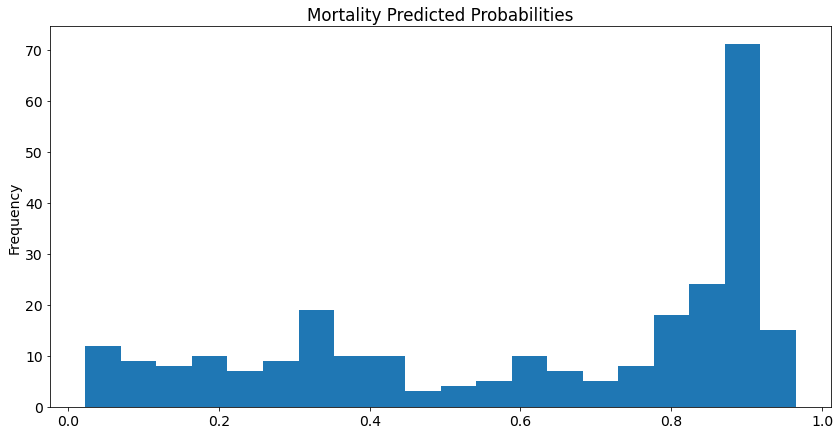

In [ ]:
# Lanzamos la predicción de nuevop como el conjunto de evaluación
pred_dicts = list(linear_est.predict(eval_input_fn))
# Seleccionamos la probabilidad de mortalidad que en este caso ocupa la posición 0 de la clave del diccionario probabilities
mortality_probs = pd.Series([pred['probabilities'][0] for pred in pred_dicts]) 

mortality_probs.plot(kind='hist', bins=20, title='Mortality Predicted Probabilities') # Representamos en forma de histograma

### Cambiando el conjunto de entrenamiento

Sabemos que uno de los factores más importantes en el entrenamiento de redes neuronales es la cantidad y calidad del conjunto de entrenamiento. ¿Es igual de importante en regresión lineal?

Vamos a ver cuál sería el porcentaje de acierto de nuestro modelo si entrenamos con la mitad del conjunto de entrenamiento:

In [ ]:
#Procedemos a dividir el set de entrenamiento a la mitad. Tanto la parte de las features como el de las clases.
middle_dftrain = dftrain.iloc[:dftrain.shape[0]//2]
middel_y_train = y_train.iloc[:y_train.shape[0]//2]
print(middle_dftrain.shape)
print(middel_y_train.shape)

(313, 9)
(313,)


In [ ]:
# Creamos el modelo
middle_linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

# Preparamos los datos para pasarlos al modelo.
middle_train_input_fn = make_input_fn(middle_dftrain, middel_y_train) 

# Entrenamos el modelo
middle_linear_est.train(middle_train_input_fn) 

# Generamos los resultados con resepecto al dataset de evaluación
middle_result = middle_linear_est.evaluate(eval_input_fn)  
clear_output()  # limpiamos la consola
#Observamos los indicadores que nos muestra en la predicción.
pprint.pprint(middle_result)


{'accuracy': 0.7462121,
 'accuracy_baseline': 0.625,
 'auc': 0.79048055,
 'auc_precision_recall': 0.75991195,
 'average_loss': 0.5495553,
 'global_step': 100,
 'label/mean': 0.375,
 'loss': 0.55702466,
 'precision': 0.63793105,
 'prediction/mean': 0.4907745,
 'recall': 0.74747473}


In [ ]:
# Tomaremos el valor de precisión que nos devuelve la capacidad del modelo para detectar el porcentaje de detactra los positivos
print(f"Precission con la mitad de los datos : {middle_result['precision']}")

Precission con la mitad de los datos : 0.6379310488700867


Y si entrenamos con una décima parte de en nuestro ejemplo original?

In [ ]:
#Procedemos a dividir el set de entrenamiento a la mitad. Tanto la parte de las features como el de las clases.
tenth_dftrain = dftrain.iloc[:dftrain.shape[0]//10]
tenth_y_train = y_train.iloc[:y_train.shape[0]//10]
print(tenth_dftrain.shape)
print(tenth_y_train.shape)

(62, 9)
(62,)


In [ ]:
# Creamos el modelo
tenth_linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

# Preparamos los datos para pasarlos al modelo.
tenth_train_input_fn = make_input_fn(tenth_dftrain, tenth_y_train) 

# Entrenamos el modelo
tenth_linear_est.train(tenth_train_input_fn) 

# Generamos los resultados con resepecto al dataset de evaluación
tenth_result = tenth_linear_est.evaluate(eval_input_fn)  
clear_output()  # limpiamos la consola
pprint.pprint(tenth_result)

{'accuracy': 0.64772725,
 'accuracy_baseline': 0.625,
 'auc': 0.74153656,
 'auc_precision_recall': 0.6275006,
 'average_loss': 0.6232077,
 'global_step': 20,
 'label/mean': 0.375,
 'loss': 0.62094957,
 'precision': 0.6875,
 'prediction/mean': 0.2446909,
 'recall': 0.11111111}


In [ ]:
# Tomaremos el valor de precisión que nos devuelve la capacidad del modelo para detectar el porcentaje de detactra los positivos
print(f"Precission con la decima parte de los datos : {tenth_result['precision']}")

Precission con la decima parte de los datos : 0.6875


Por último, vamos a mostrar también el accuracy que tenemos sobre el conjunto de datos de entrenamiento (podemos utilizar cualquiera de los modelos que acabamos de entrenar)


In [ ]:
print(f"Accuracy con la mitad de los datos :  {middle_result['accuracy']}")
print(f"Accuracy con la decima parte de los datos : {tenth_result['accuracy']}")

Accuracy con la mitad de los datos :  0.7462121248245239
Accuracy con la decima parte de los datos : 0.6477272510528564


### Conclusiones:
 
¿Hay mucha diferencia entre el entrenamiento original y el que hemos realizado con datos diezmados? ¿Por qué?

Se observan diferencias en los indicadores señeccionados, tanto el ***precission*** como el ***accuracy***, en el que son cada vez más bajos conforme vamos reduciendo la cantidad de datos de entranamiento.
La razón es que contra menos datos de entranamiento le proveamos a nuestro modelo, menos conocimiento o casuísticas tendra entrenadas para abordar los datos reales\de producción.